### Business Understanding

This data set is about a company that sells houses near the place of King County, we are given this big dataset of houses sold on this place with its given features, the idea of this analysis is to give support making decisions about which house to sell for which price, show you what can be the best and worst profits. Where is the place with most expensive houses ?  What makes a house become expensive ? 

These are some common questions that i intend to answer or give a plausible explanation for among this analysis.

Source of the dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing some libraries that are going to be used in the analysis

In [3]:
sns.set()

#color pattern i'll use on the plots

In [4]:
df_original_dataset = pd.read_csv("kc_house_data.csv")
df_housedata = df_original_dataset.copy() #creating a copy so i don't modify the original dataset.
df_housedata.head() #checking the data overview

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_housedata.info()
#checking data information and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df_housedata.describe()

#gathering statistical info about the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df_housedata.drop(['id'],axis=1,inplace=False)
#ID is a useless column in the dataset to analyze the data.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df_housedata['date'] = df_housedata['date'].str[0:8]
#Deleted all the last 5 digits of the Date column because they were all equal and had no info.

In [9]:
sum(df_housedata.duplicated())
#Checking for Duplicated Values

0

In [10]:
df_housedata['date'] = pd.to_datetime(df_housedata['date'],yearfirst = True)
#rearranging data types to YYYY-MM-DD

## Data Preparation Insights

- Dropped ID Column because it's useless for data analysis.

- Deleted all the last 5 digits of 'Date' Column because they were all equal.

- Dates are written as Year-Month-Day.

- We have no null and no duplicated values.

# Exploratory Data Analysis

In this part of the analysis, I intend to build a basic data understanding, analysing some variables in the dataset and its interaction with some other variables, always trying to measure the impact of each variable with the Price (our main target).

## Basic Data Understanding

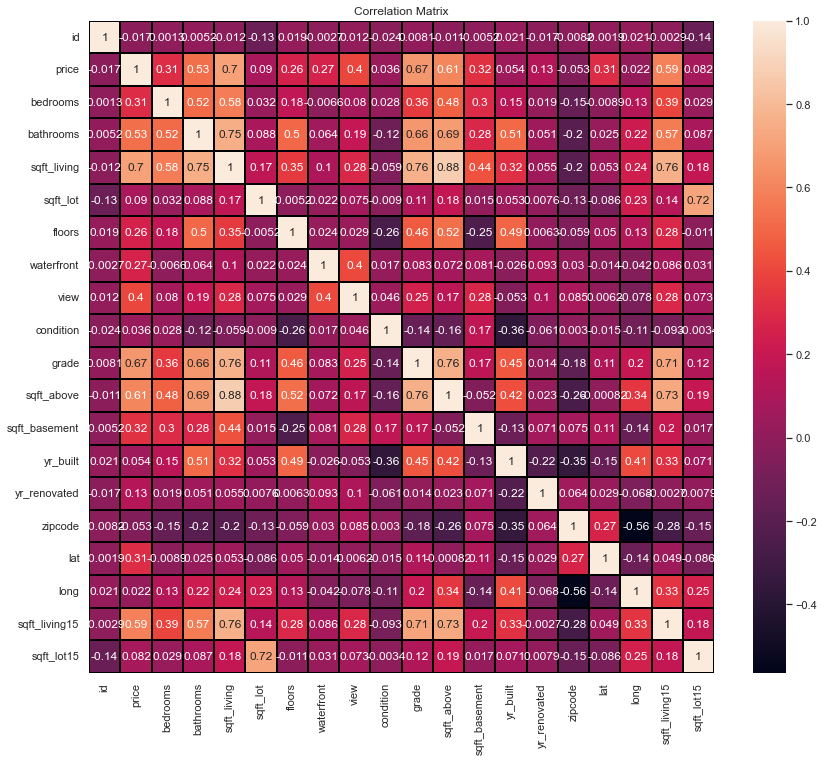

In [11]:
plt.figure(figsize = (14,12))
plt.title('Correlation Matrix')
df_housedata.corr()
heatmap = sns.heatmap(df_housedata.corr(), annot=True,linewidths=2,linecolor='black')

#Checking correlation values of each variable present in the dataset.

### About Basic Data Understanding:

- We print a correlation Matrix just to understand a little bit better how the variables have relations with each other, so we can have better insights in future variable analysis.

- The correlation matrix shows us that most variables doesn't have a good correlation, meaning, they don't interact well with each other, (probably) not having any direct relationship between them.

- Latitude, Longitude, Zip Code, Year Renovated, Ft² Lot and Ft² Lot15 have almost zero correlation with every other variable in the dataset, so, they won't be analysed deeply in this particular study.

## Date

Text(0, 0.5, 'Number of Houses sold')

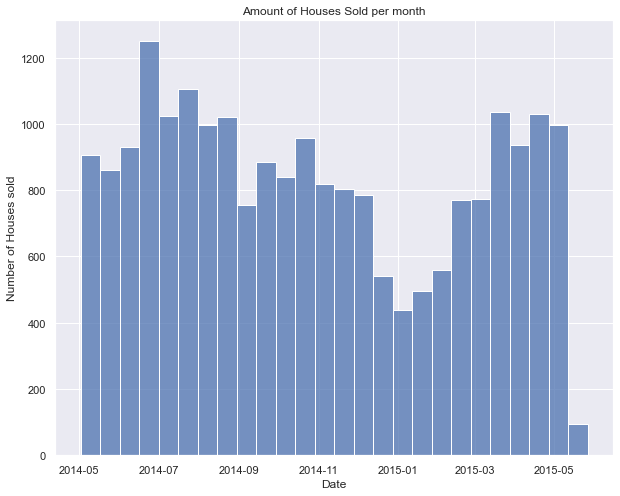

In [12]:
plt.figure(figsize = (10,8))
sns.histplot(df_housedata['date'])
plt.title('Amount of Houses Sold per month')
plt.xlabel('Date')
plt.ylabel('Number of Houses sold')


In [13]:
df_housedata['house_updated'] = df_housedata['yr_renovated'] - df_housedata['yr_built']
#creating a column to show how many years it took for the house to be renovated

In [14]:
df_housedata['house_updated']

0       -1955
1          40
2       -1933
3       -1965
4       -1987
         ... 
21608   -2009
21609   -2014
21610   -2009
21611   -2004
21612   -2008
Name: house_updated, Length: 21613, dtype: int64

In [15]:
outlier_filter = df_housedata['house_updated']>0
#I'm considering any value below 0 as a house that hasn't been renovated, so i'm filtering it because the goal is to
#understand only houses that have been renewed.

Text(0, 0.5, 'Number of Houses sold')

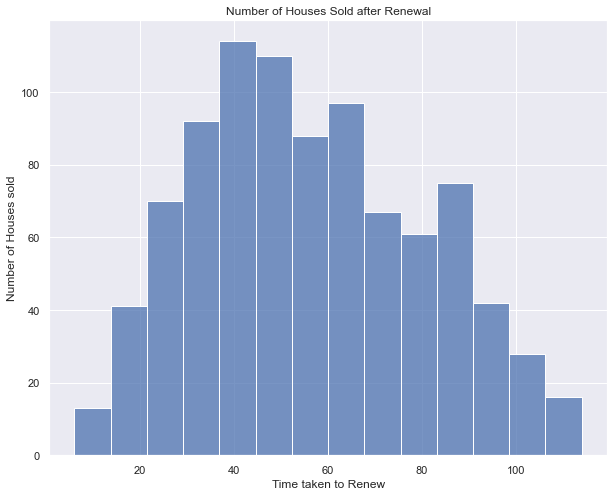

In [16]:
plt.figure(figsize = (10,8))
sns.histplot(df_housedata['house_updated'][outlier_filter])
plt.title('Number of Houses Sold after Renewal')
plt.xlabel('Time taken to Renew')
plt.ylabel('Number of Houses sold')


In [17]:
df_housedata['house_updated'][outlier_filter].count()
#Only 914 Houses have been renewed.

914

In [18]:
sales_2014 = pd.DatetimeIndex(df_housedata['date']).year == 2014
sales_2015 = pd.DatetimeIndex(df_housedata['date']).year == 2015
print(sales_2014.sum(),sales_2015.sum())

14633 6980


### About Dates:

- The house sales analysis is about 12 months interval, from May 2014 to May 2015.

- The number of houses sold in 2014 is 2 times bigger than the amount in 2015.

- Only 914 Houses have been Rebuilt/Renewed, and most of those took 30-50 Years to need a repair.

## Bedrooms

Text(0, 0.5, 'Number of Houses sold')

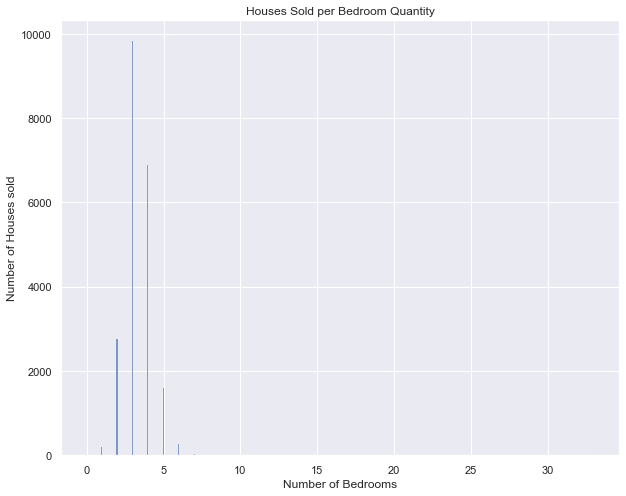

In [19]:
plt.figure(figsize = (10,8))
sns.histplot(df_housedata['bedrooms'])
plt.title('Houses Sold per Bedroom Quantity')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses sold')

c:\Users\rcutr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of Bedrooms')

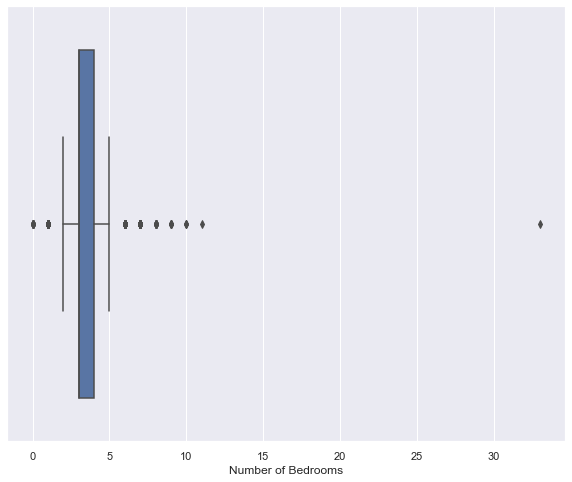

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(df_housedata['bedrooms'])
plt.xlabel('Number of Bedrooms')

#We can see some strange outliers, some houses have 33 Bedrooms, and some houses have 0 bedrooms

In [21]:
#Checking for the amount of houses sold with 6 or less bedrooms
print('Amount of houses sold with More than 6 Bedrooms -->',(df_housedata['bedrooms']<=6).sum())
print('Amount of houses sold with no bedrooms -->',(df_housedata['bedrooms']==0).sum())

Amount of houses sold with More than 6 Bedrooms --> 21551
Amount of houses sold with no bedrooms --> 13


In [22]:
bed_outliers = df_housedata['bedrooms']<=6
bed_outliers_zeroes = df_housedata['bedrooms']>0

#I assume 6 or more as outliers, because we have 21613 houses to check, and only 62 houses have more than 6 bedrooms
#We can also assume 0 as outliers because it makes no sense for a house to be sold without a single bedroom in it.

Text(0.5, 1.0, 'Houses Sold per Bedroom quantity')

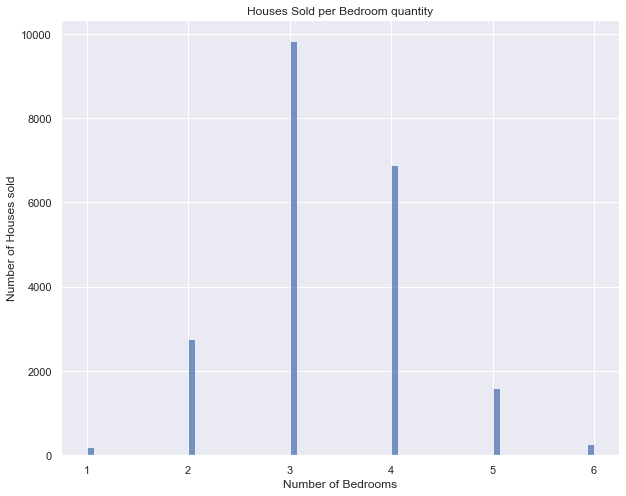

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(df_housedata['bedrooms'][bed_outliers][bed_outliers_zeroes])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses sold')
plt.title('Houses Sold per Bedroom quantity')

Text(0, 0.5, 'House Price')

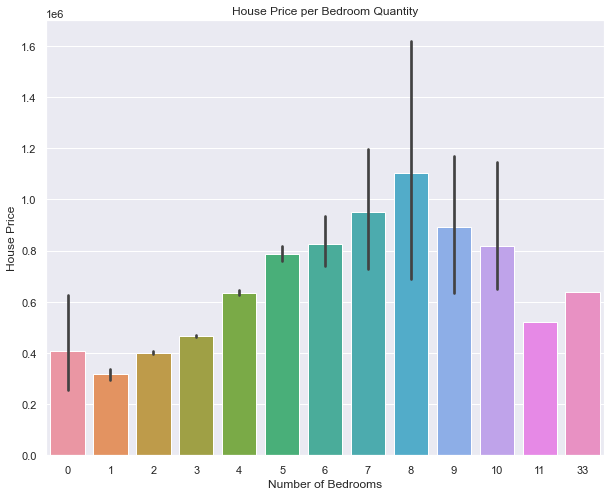

In [24]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["bedrooms"], y = df_housedata["price"])
plt.title('House Price per Bedroom Quantity')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')

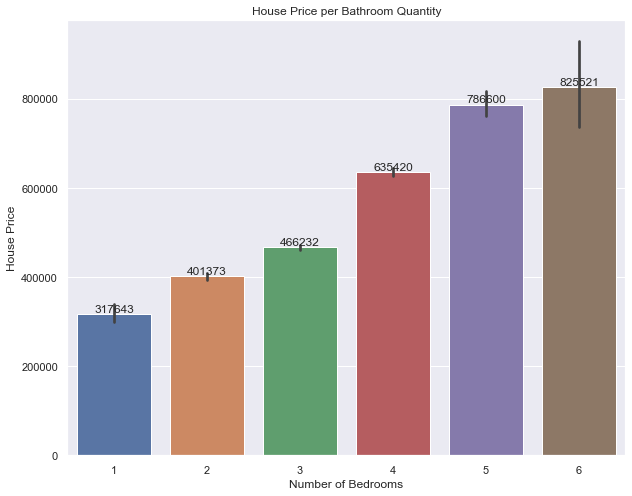

In [25]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x = df_housedata["bedrooms"][bed_outliers][bed_outliers_zeroes], y = df_housedata["price"])
plt.title('House Price per Bathroom Quantity')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
for i in ax.containers:
    ax.bar_label(i,)
#Using the same analysis but excluding the outliers.

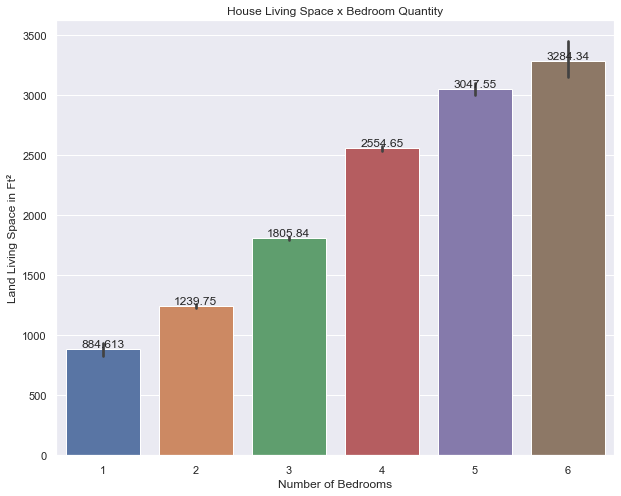

In [26]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x = df_housedata["bedrooms"][bed_outliers][bed_outliers_zeroes], y = df_housedata["sqft_living"])
plt.title('House Living Space x Bedroom Quantity')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Land Living Space in Ft²')
for i in ax.containers:
    ax.bar_label(i,)

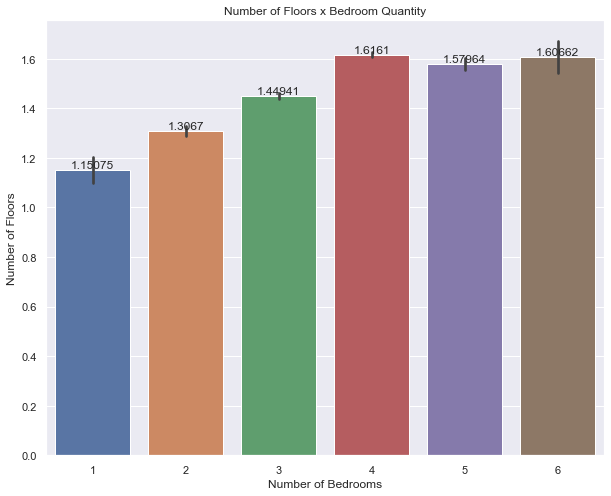

In [27]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x = df_housedata["bedrooms"][bed_outliers][bed_outliers_zeroes], y = df_housedata["floors"])
plt.xlabel('Number of Bedrooms')
plt.title('Number of Floors x Bedroom Quantity')
plt.ylabel('Number of Floors')
for i in ax.containers:
    ax.bar_label(i,)

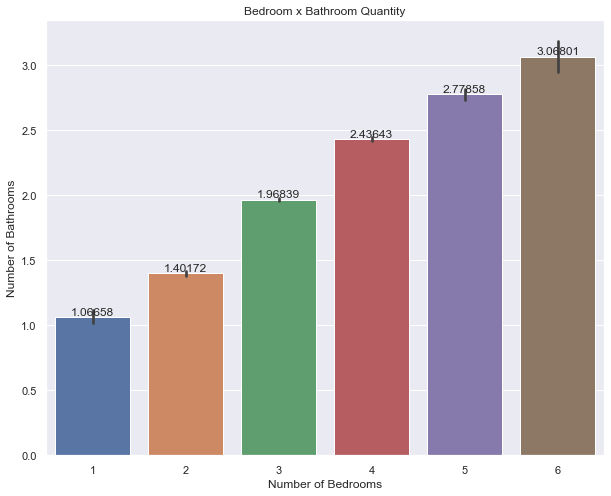

In [28]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x = df_housedata["bedrooms"][bed_outliers][bed_outliers_zeroes], y = df_housedata["bathrooms"])
plt.title('Bedroom x Bathroom Quantity')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
for i in ax.containers:
    ax.bar_label(i,)

### Bedroom Insights

- We have Outliers, houses sold with more than 6 and with 0 bedrooms.

- Most houses that have been sold, have 3 to 4 bedrooms.

- House prices tend to increase with bedroom quantity.

- Bedrooms and Bathrooms quantity tend to increase together, perhaps most bathrooms are inside the bedrooms.

- Houses with big living spaces usually have more bedrooms.

## Bathrooms

Text(0, 0.5, 'Number of Houses sold')

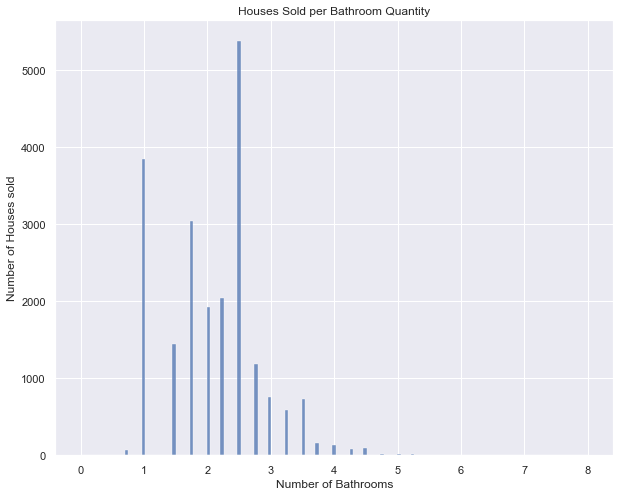

In [29]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['bathrooms'])
plt.title('Houses Sold per Bathroom Quantity')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses sold')

In [30]:
print('Amount of houses with no bathrooms -->',(df_housedata['bathrooms']==0).sum())
print('Amount of houses with just a toilet, but no shower -->',(df_housedata['bathrooms']==0.5).sum())

Amount of houses with no bathrooms --> 10
Amount of houses with just a toilet, but no shower --> 4


c:\Users\rcutr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of Bathrooms')

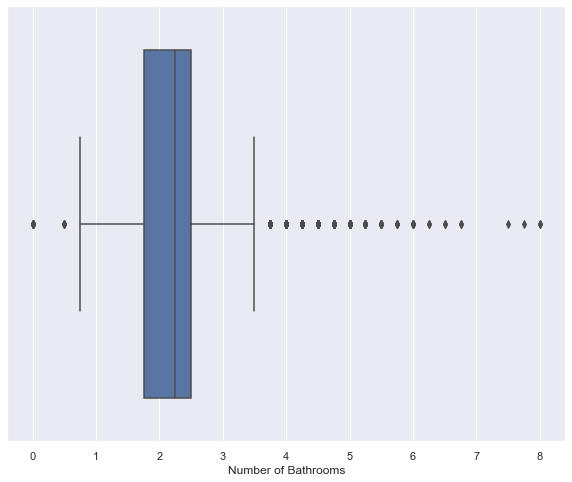

In [31]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(df_housedata['bathrooms'])
plt.xlabel('Number of Bathrooms')

In [32]:
(df_housedata['bathrooms']<=4).sum()

21347

In [33]:
bathroom_outliers = df_housedata['bathrooms']<=4
bathroom_outliers_zeroes = df_housedata['bathrooms']>0.5
#We can consider 0, 0.5 and >4 outliers as they're equivalent to almost less than 1% of the data analyzed

Text(0, 0.5, 'Number of Houses sold')

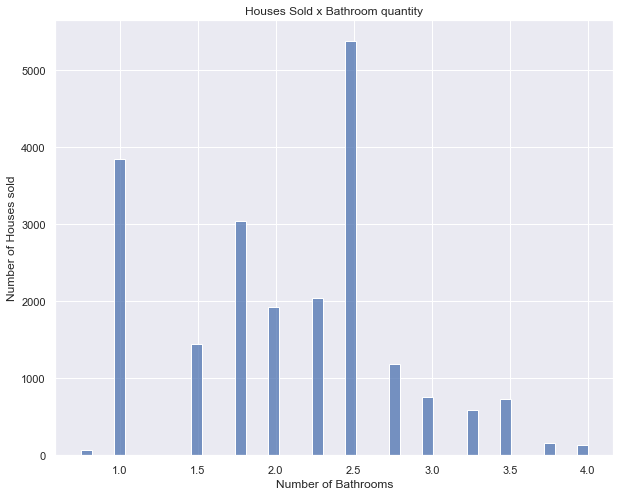

In [34]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['bathrooms'][bathroom_outliers][bathroom_outliers_zeroes])
plt.title('Houses Sold x Bathroom quantity')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses sold')

Text(0, 0.5, 'House Price')

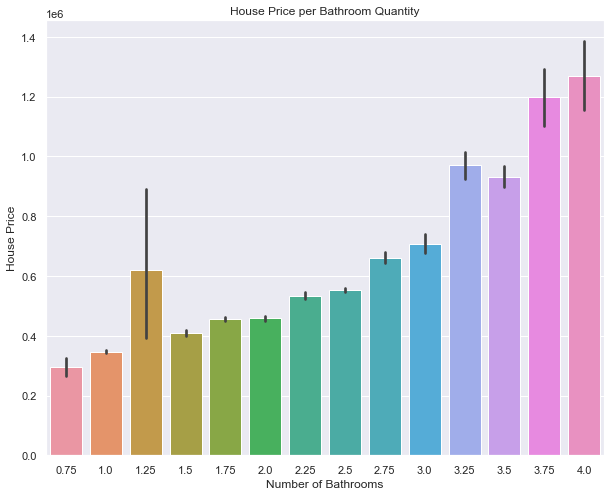

In [35]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["bathrooms"][bathroom_outliers][bathroom_outliers_zeroes], y = df_housedata["price"])
plt.title('House Price per Bathroom Quantity')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')

Text(0, 0.5, 'Land Living Space in Ft²')

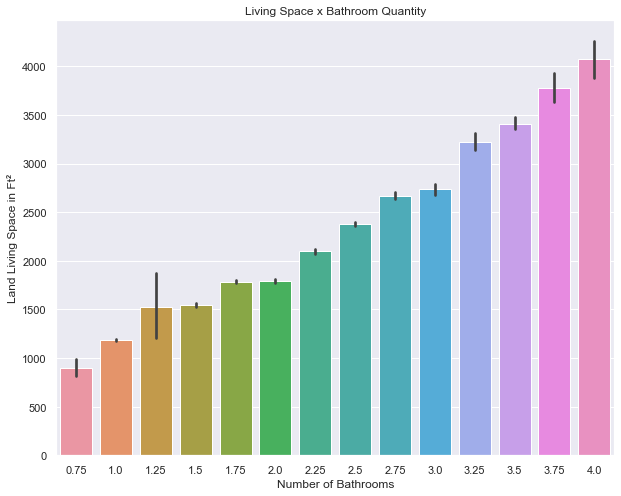

In [36]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["bathrooms"][bathroom_outliers][bathroom_outliers_zeroes], y = df_housedata["sqft_living"])
plt.title('Living Space x Bathroom Quantity')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Land Living Space in Ft²')

Text(0, 0.5, 'Number of Floors')

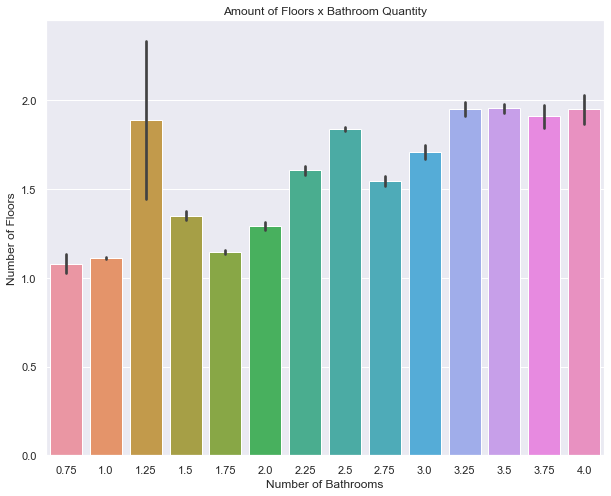

In [37]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["bathrooms"][bathroom_outliers][bathroom_outliers_zeroes], y = df_housedata["floors"])
plt.title('Amount of Floors x Bathroom Quantity')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Floors')

Text(0, 0.5, 'House Construction Grade Evaluation')

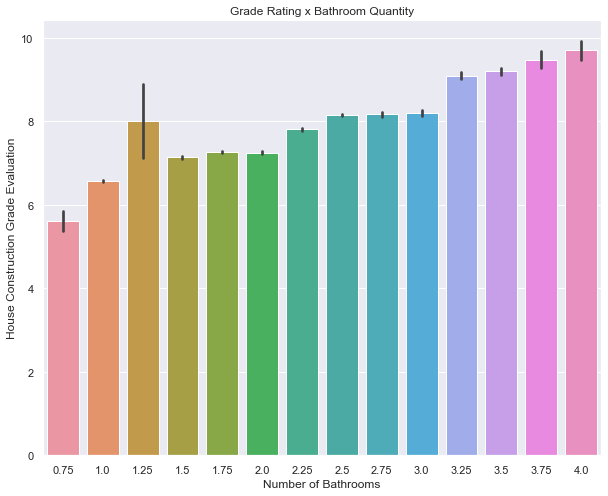

In [38]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["bathrooms"][bathroom_outliers][bathroom_outliers_zeroes], y = df_housedata["grade"])
plt.title('Grade Rating x Bathroom Quantity')
plt.xlabel('Number of Bathrooms')
plt.ylabel('House Construction Grade Evaluation')

### Bathroom Insights

- We have Outliers, houses with more than 4 bathrooms, and houses with less than 0,5 bathrooms (0,5 means it has at least a sink).

- The average house has 2 to 3 bathrooms.

- House prices are higher the more bathrooms they have.

- Houses tend to have more bathroom the more living space they have.

- Houses with more bathrooms tend to have a slightly better grade evaluation.

## Square Feet Living

Text(0, 0.5, 'Number of Houses sold')

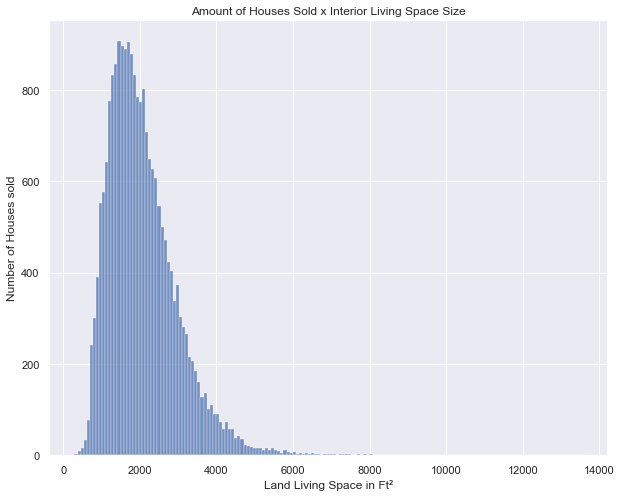

In [39]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['sqft_living'])
plt.title('Amount of Houses Sold x Interior Living Space Size')
plt.xlabel('Land Living Space in Ft²')
plt.ylabel('Number of Houses sold')

c:\Users\rcutr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Interior Living Space Size in Ft²')

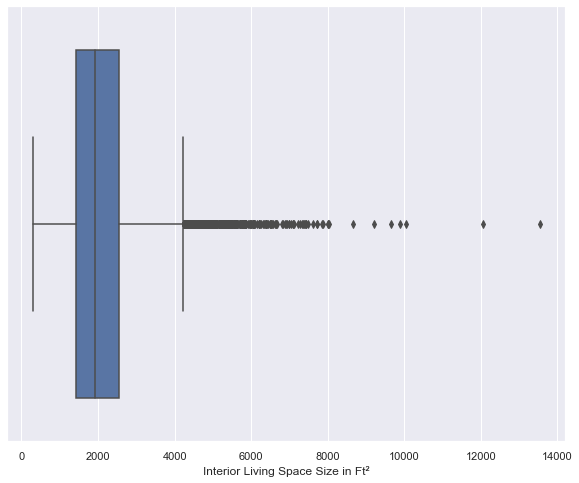

In [40]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(df_housedata['sqft_living'])
plt.xlabel('Interior Living Space Size in Ft²')

In [41]:
(df_housedata['sqft_living']>=4000).sum()

#790 is still a small number comparing a 21613 sample dataset, so i'm considering those as outliers, just as the boxplot suggests

790

In [42]:
livingspace_outliers = df_housedata['sqft_living']<=4000

Text(0, 0.5, 'Number of Houses sold')

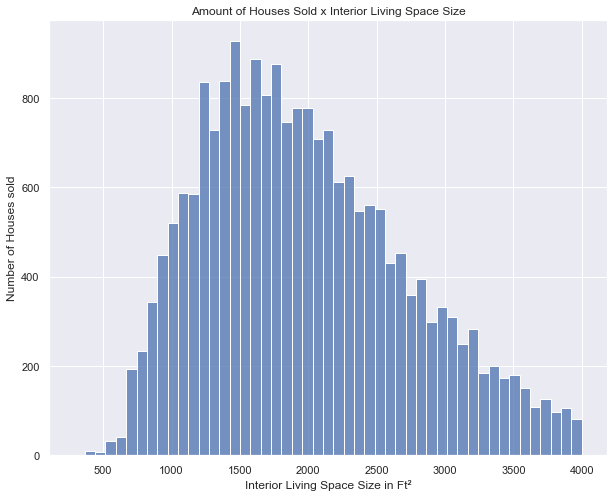

In [43]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['sqft_living'][livingspace_outliers])
plt.title('Amount of Houses Sold x Interior Living Space Size')
plt.xlabel('Interior Living Space Size in Ft²')
plt.ylabel('Number of Houses sold')

Text(0, 0.5, 'House Price')

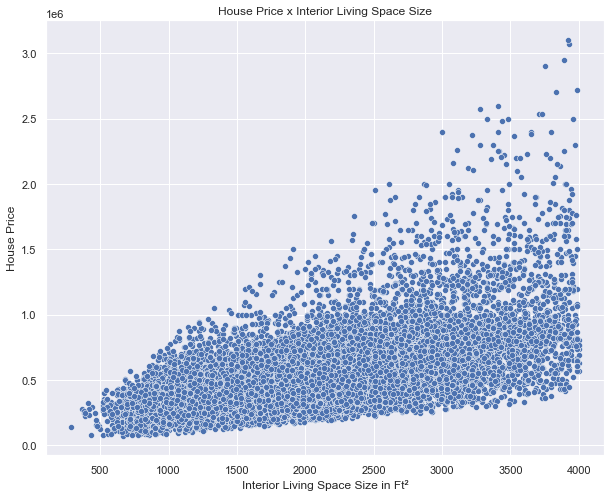

In [44]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x = df_housedata["sqft_living"][livingspace_outliers], y = df_housedata["price"])
plt.title('House Price x Interior Living Space Size')
plt.xlabel('Interior Living Space Size in Ft²')
plt.ylabel('House Price')

Text(0, 0.5, 'Interior Footage Above Ground Level')

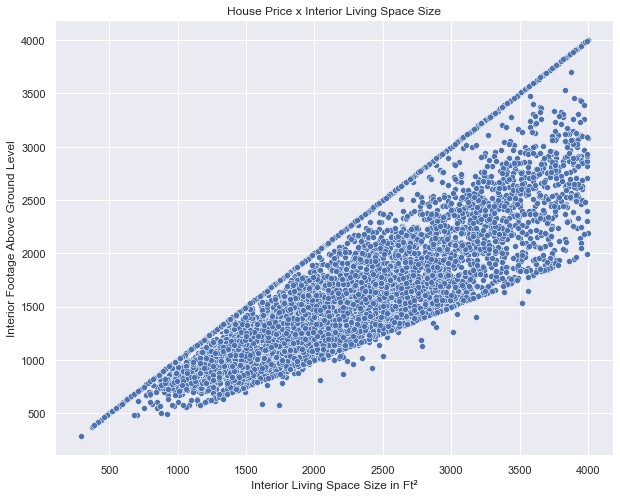

In [45]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x = df_housedata["sqft_living"][livingspace_outliers], y = df_housedata["sqft_above"])
plt.title('House Price x Interior Living Space Size')
plt.xlabel('Interior Living Space Size in Ft²')
plt.ylabel('Interior Footage Above Ground Level')

Text(0, 0.5, 'Interior Footage Below Ground Level')

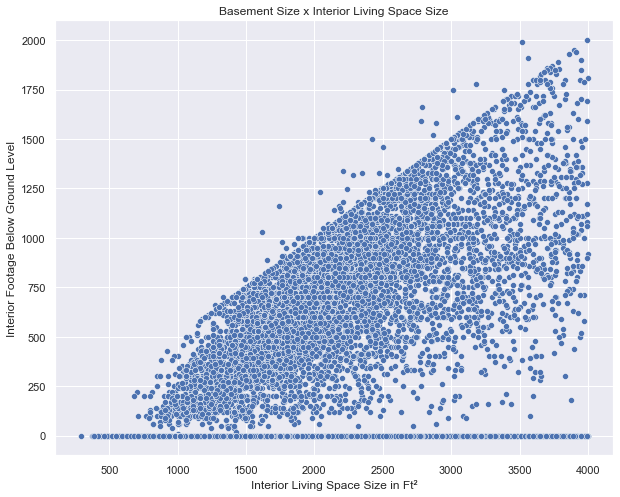

In [46]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x = df_housedata["sqft_living"][livingspace_outliers], y = df_housedata["sqft_basement"])
plt.title('Basement Size x Interior Living Space Size')
plt.xlabel('Interior Living Space Size in Ft²')
plt.ylabel('Interior Footage Below Ground Level')

### FT² Living Insights

- We have Outliers, houses with >4000ft² of living space.

- House prices are higher if they have a bigger living space.

- The interior living space size and the space above the ground of most houses are directly related.

- House grade rating tend to be better as their living space is bigger.

- Basement space increases with house interior living space size.

## Floors

Text(0, 0.5, 'Number of Houses Sold')

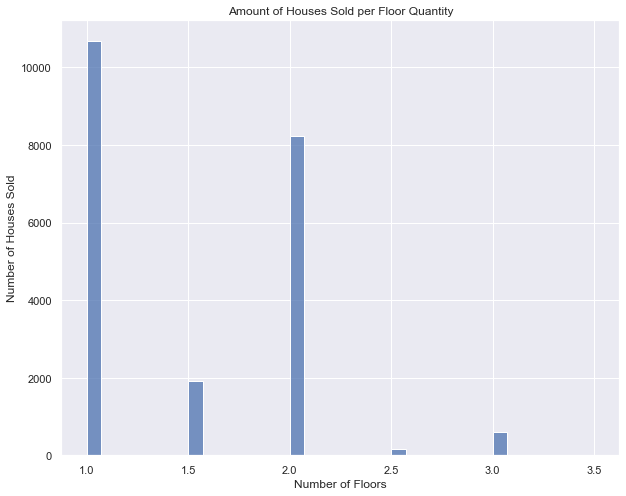

In [47]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['floors'])
plt.title('Amount of Houses Sold per Floor Quantity')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Houses Sold')

c:\Users\rcutr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of Floors')

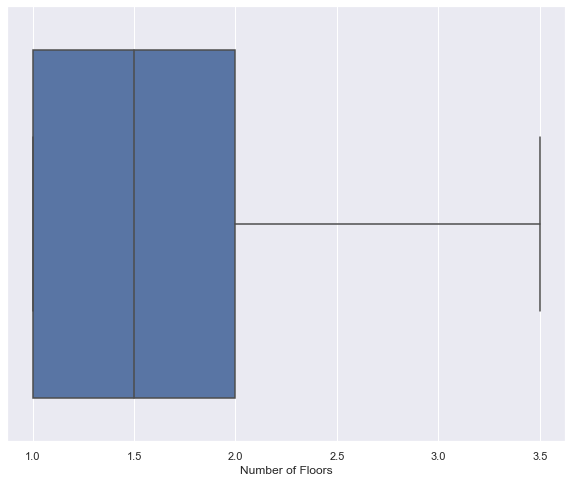

In [48]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(df_housedata['floors'])
plt.xlabel('Number of Floors')

In [49]:
print('Amount of houses sold with 3 or more floors -->',(df_housedata['floors']>=3.0).sum())
print('Amount of houses sold with 2 or more floors -->',(df_housedata['floors']>2.0).sum()) 
#Even though these numbers are very small, the boxplot doesn't consider them as outliers with default whis

Amount of houses sold with 3 or more floors --> 621
Amount of houses sold with 2 or more floors --> 782


In [50]:
(df_housedata['floors']<=2.0).sum()

20831

Text(0, 0.5, 'House Price')

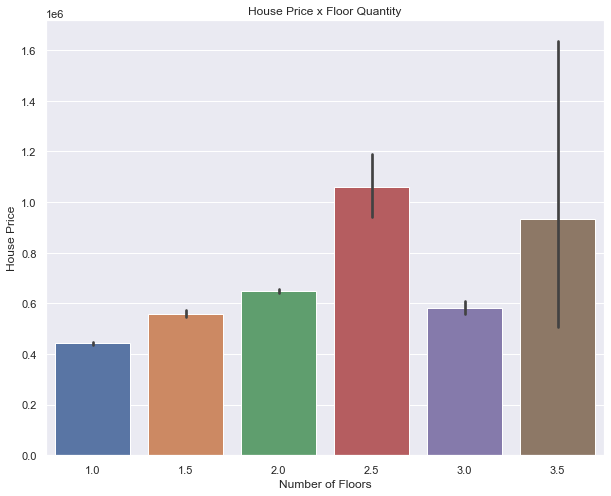

In [51]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["floors"], y = df_housedata["price"])
plt.title('House Price x Floor Quantity')
plt.xlabel('Number of Floors')
plt.ylabel('House Price')

#As we can see, the error line indicates that the 3.5 Floors Bar have a High Uncertainty due to low quantity of samples to analyze. 

Text(0, 0.5, 'Land Living Space in Ft²')

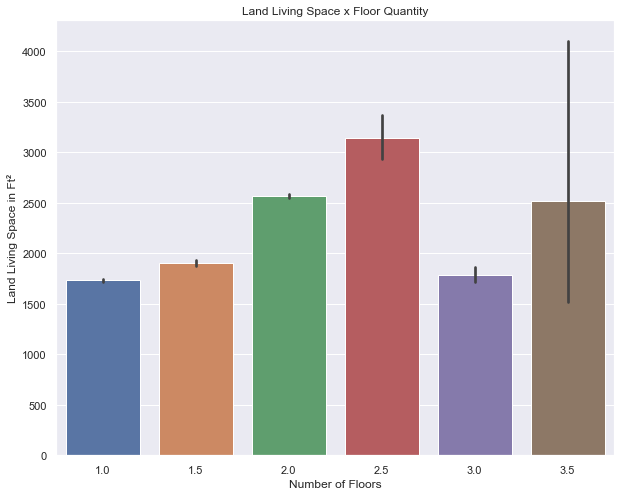

In [52]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["floors"], y = df_housedata["sqft_living"])
plt.title('Land Living Space x Floor Quantity')
plt.xlabel('Number of Floors')
plt.ylabel('Land Living Space in Ft²')

Text(0, 0.5, 'Number of Bedrooms')

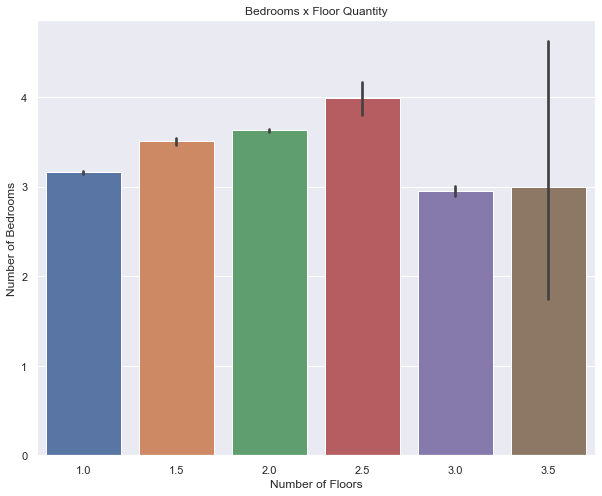

In [53]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["floors"], y = df_housedata["bedrooms"])
plt.title('Bedrooms x Floor Quantity')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Bedrooms')

Text(0, 0.5, 'Interior Living Space Above Ground')

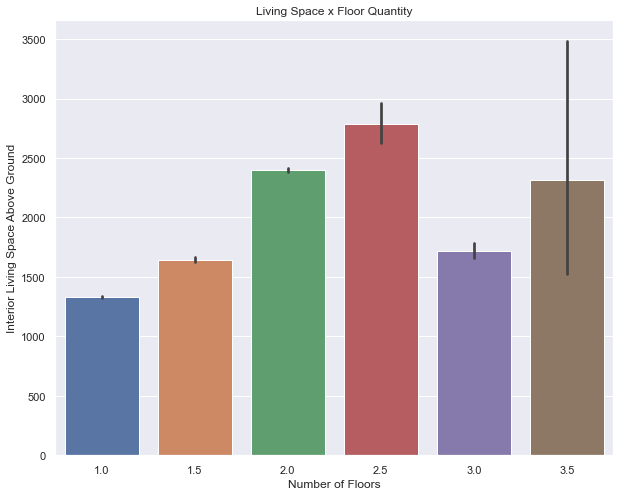

In [54]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["floors"], y = df_housedata["sqft_above"])
plt.title('Living Space x Floor Quantity')
plt.xlabel('Number of Floors')
plt.ylabel('Interior Living Space Above Ground')

### Insights:

- Mean house floor quantity is 1.5, we can consider 3,5 floors or more as Outliers, since there are only 621 houses with 3 or more floors and the Error Line on 3.5 Bars are very high.

- House prices slightly increase with floor quantity.

- Houses with big interior living space tend to have more floors.

- More than 90% of houses have 2 or less floors.

## View

Text(0, 0.5, 'Number of Houses Sold')

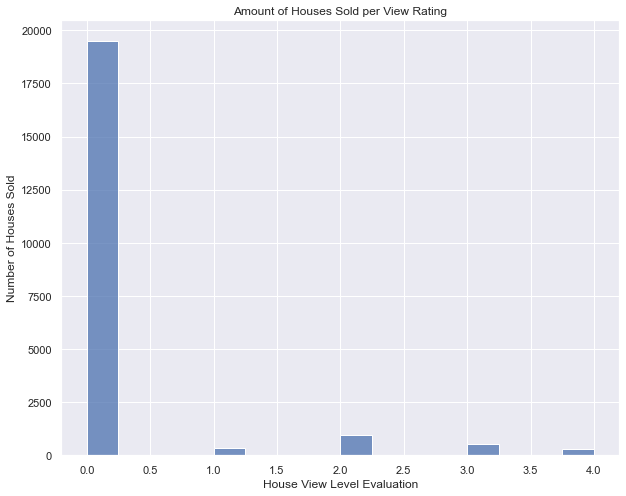

In [55]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['view'])
plt.title('Amount of Houses Sold per View Rating')
plt.xlabel('House View Level Evaluation')
plt.ylabel('Number of Houses Sold')

In [56]:
(df_housedata['view']<=1).sum()

19821

Text(0, 0.5, 'House Price')

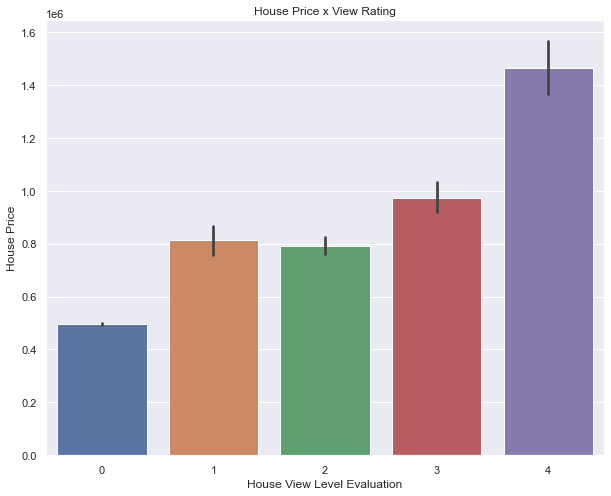

In [57]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["view"], y = df_housedata["price"])
plt.title('House Price x View Rating')
plt.xlabel('House View Level Evaluation')
plt.ylabel('House Price')

Text(0, 0.5, 'Waterfront view Existance')

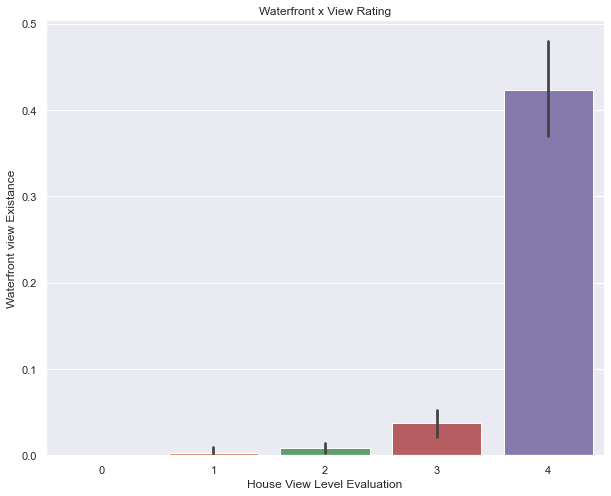

In [58]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["view"], y = df_housedata["waterfront"])
plt.title('Waterfront x View Rating')
plt.xlabel('House View Level Evaluation')
plt.ylabel('Waterfront view Existance')

Text(0, 0.5, 'House Construction Grade Evaluation')

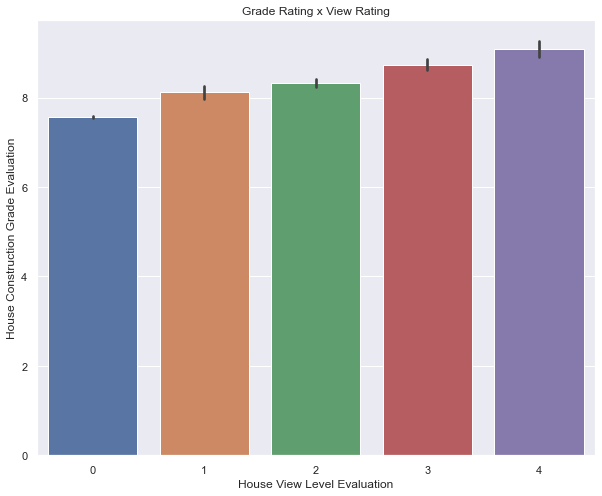

In [59]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata['view'], y = df_housedata["grade"])
plt.title('Grade Rating x View Rating')
plt.xlabel('House View Level Evaluation')
plt.ylabel('House Construction Grade Evaluation')

In [60]:
(df_housedata['view']!=0).sum()

2124

In [61]:
(df_housedata['view']==0).sum()

19489

In [62]:
(df_housedata['view']==0).mean()

0.9017258131680007

Text(0, 0.5, 'Number of Floors')

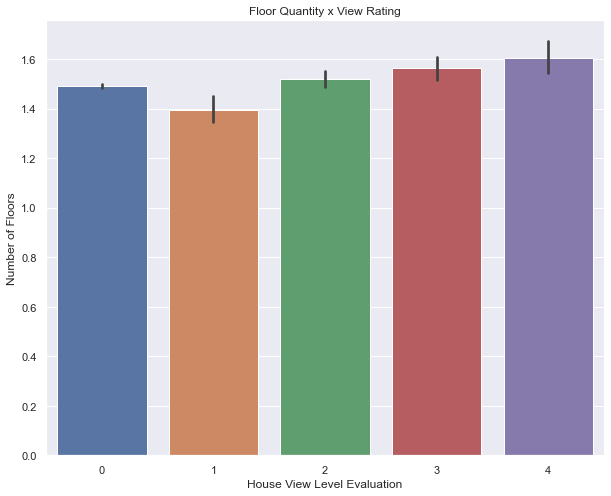

In [63]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["view"], y = df_housedata["floors"])
plt.title('Floor Quantity x View Rating')
plt.xlabel('House View Level Evaluation')
plt.ylabel('Number of Floors')

### Insights:

- House prices increase with a bigger view rating.

- Houses with waterfront are well view-rated.

- 90% of houses have a 0 view rating (which is hard to tell how bad it is because it's probably a very biased rating).

- Only 2124 (2% of houses) have a view rating above normal level (considering 0 as normal, as its so common).


## Waterfront

Text(0, 0.5, 'Number of Houses Sold')

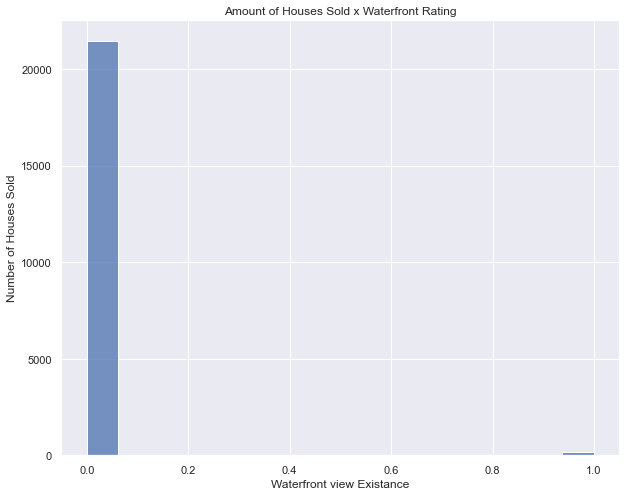

In [64]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x = df_housedata["waterfront"])
plt.title('Amount of Houses Sold x Waterfront Rating')
plt.xlabel('Waterfront view Existance')
plt.ylabel('Number of Houses Sold')

In [65]:
print('Amount of Houses that have a waterview -->',sum(df_housedata['waterfront']>0))

Amount of Houses that have a waterview --> 163


Text(0, 0.5, 'House Price')

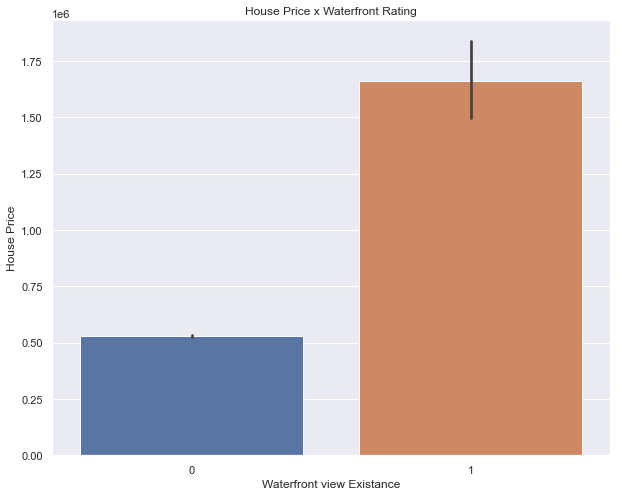

In [66]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["waterfront"], y = df_housedata["price"])
plt.title('House Price x Waterfront Rating')
plt.xlabel('Waterfront view Existance')
plt.ylabel('House Price')

Text(0, 0.5, 'View Rating Evaluation')

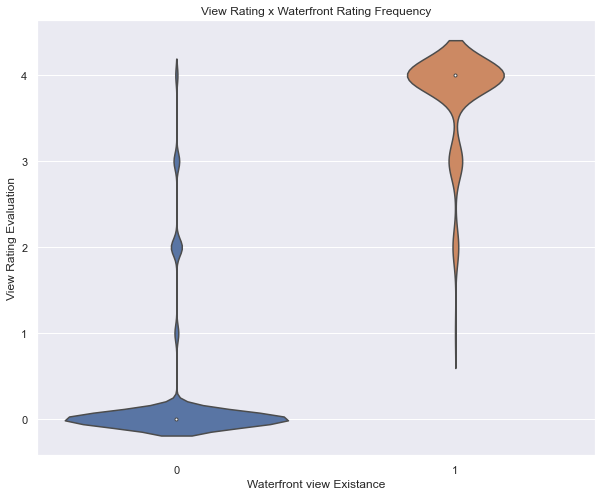

In [67]:
fig = plt.figure(figsize=(10,8))
sns.violinplot(x = df_housedata["waterfront"], y = df_housedata["view"])
plt.title('View Rating x Waterfront Rating Frequency')
plt.xlabel('Waterfront view Existance')
plt.ylabel('View Rating Evaluation')

Text(0, 0.5, 'Interior Living Space Size in Ft²')

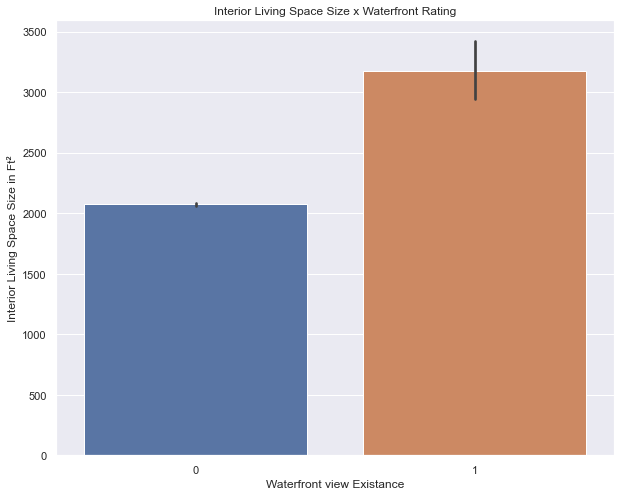

In [68]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["waterfront"], y = df_housedata["sqft_living"])
plt.title('Interior Living Space Size x Waterfront Rating')
plt.xlabel('Waterfront view Existance')
plt.ylabel('Interior Living Space Size in Ft²')

### Waterfront conclusions:

Houses with waterfront view have a better view rating. 

Houses with waterfront and are about 3,25 times more expensive.

Houses with waterfront tend to have a larger interior living space size.

Only 163 houses have a waterfront view.

## Condition


Text(0, 0.5, 'Number of Houses Sold')

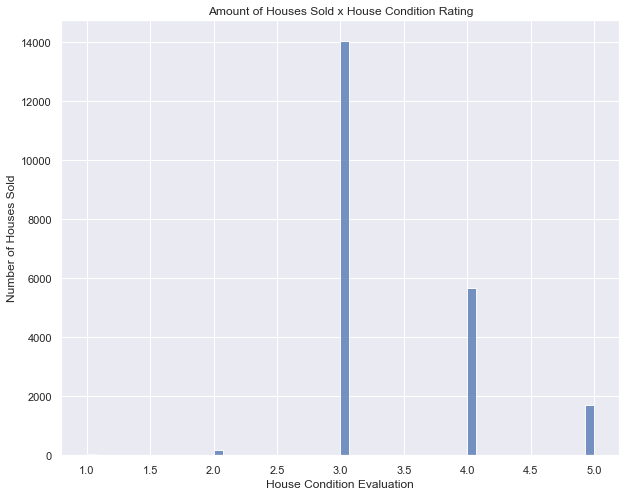

In [69]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=df_housedata['condition'])
plt.title('Amount of Houses Sold x House Condition Rating')
plt.xlabel('House Condition Evaluation')
plt.ylabel('Number of Houses Sold')

In [70]:
print('Amount of houses with 3 or less condition rating -->',(df_housedata['condition']<=3).sum())
print('Amount of houses with more than 3 conditiong rating -->',(df_housedata['condition']>3).sum())

Amount of houses with 3 or less condition rating --> 14233
Amount of houses with more than 3 conditiong rating --> 7380


Text(0, 0.5, 'House Prices')

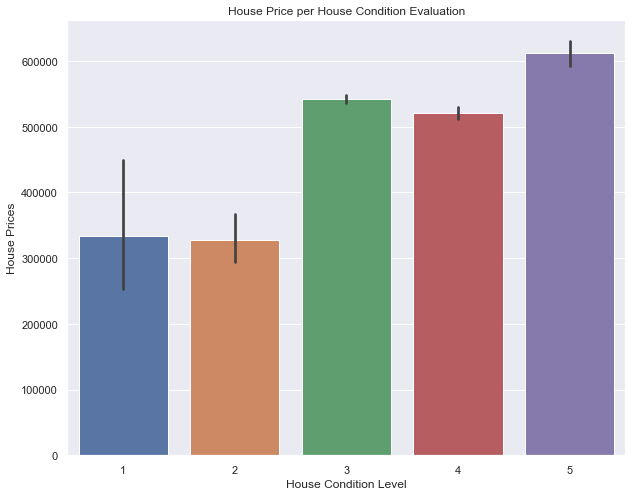

In [71]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x=df_housedata['condition'],y=df_housedata['price'])
plt.title('House Price per House Condition Evaluation')
plt.xlabel('House Condition Level')
plt.ylabel('House Prices')

Text(0, 0.5, 'House Construction Grade Evaluation')

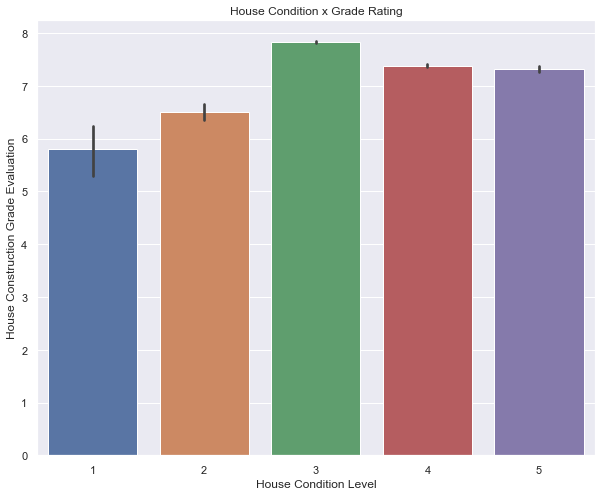

In [72]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x=df_housedata['condition'],y=df_housedata['grade'])
plt.title('House Condition x Grade Rating')
plt.xlabel('House Condition Level')
plt.ylabel('House Construction Grade Evaluation')

### Insights:

- 65,85% of the houses have average condition, with only 34,14% of the houses being above average condition.

- House price and House Condition Levels don't seem to be very correlated.

- Most average-condition houses have a good grade evaluation.

## Grade


Text(0.5, 0, 'House Construction Grade Evaluation')

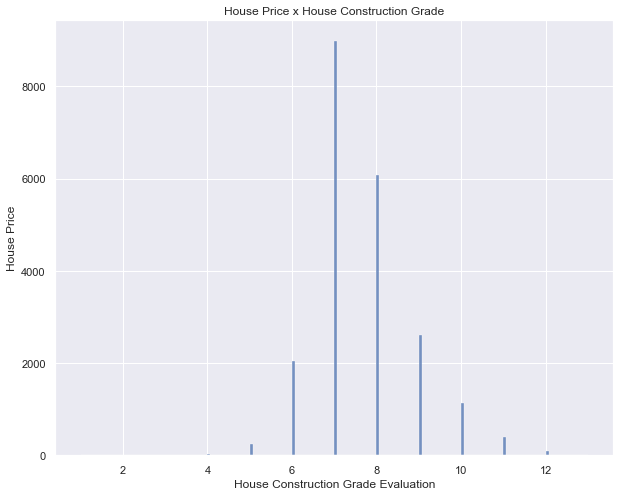

In [73]:
fig = plt.figure(figsize=(10,8))
sns.histplot(df_housedata['grade'])
plt.title('House Price x House Construction Grade')
plt.ylabel('House Price')
plt.xlabel('House Construction Grade Evaluation')

In [74]:
print((df_housedata['grade']<7).sum())
print((df_housedata['grade']>7).sum())

2313
10319


Text(0.5, 0, 'House Construction Grade Evaluation')

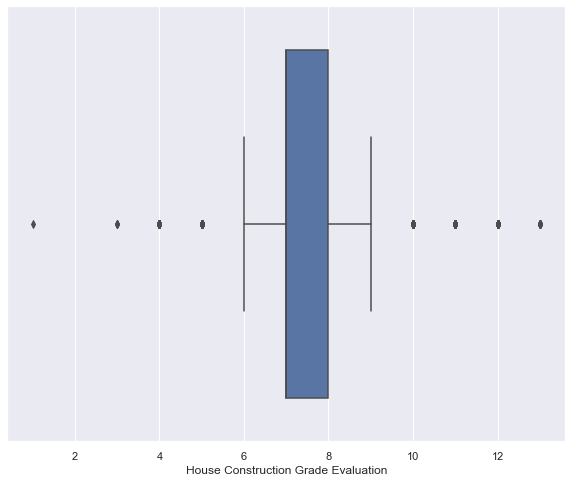

In [75]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x=df_housedata['grade'])
plt.xlabel('House Construction Grade Evaluation')

In [76]:
print(sum(df_housedata['grade']<6))
print(sum(df_housedata['grade']>10))


275
502


In [77]:
grade_filter_up = df_housedata['grade']>=6
grade_filter_low = df_housedata['grade']<=10

Text(0.5, 0, 'House Construction Grade Evaluation')

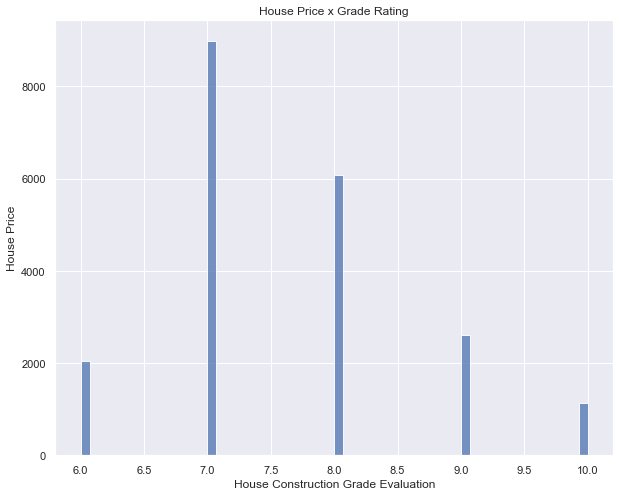

In [78]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x = df_housedata["grade"][grade_filter_up][grade_filter_low])
plt.title('House Price x Grade Rating')
plt.ylabel('House Price')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

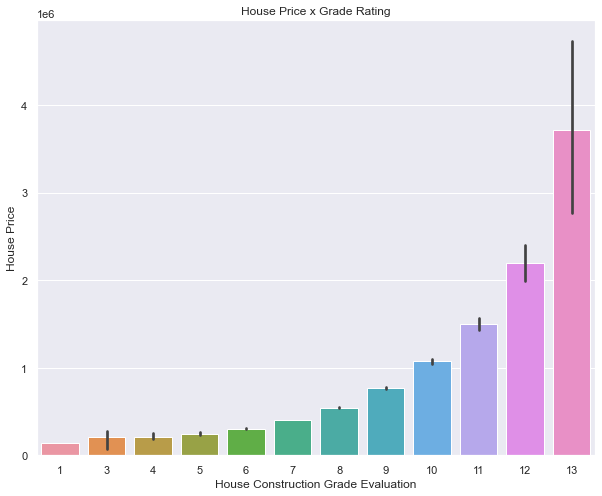

In [79]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"], y = df_housedata["price"])
plt.title('House Price x Grade Rating')
plt.ylabel('House Price')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

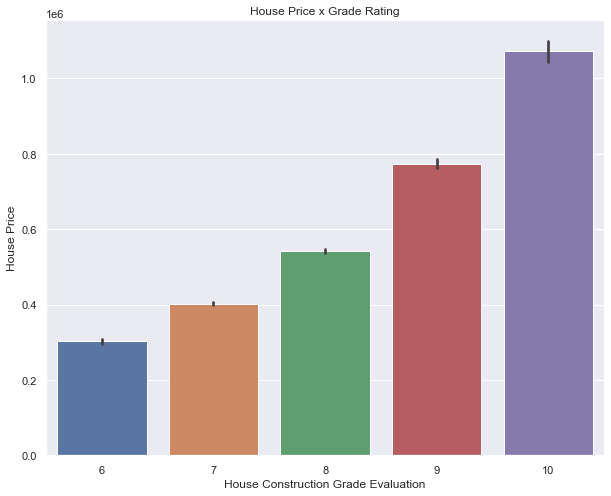

In [80]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"][grade_filter_up][grade_filter_low], y = df_housedata["price"])
plt.title('House Price x Grade Rating')
plt.ylabel('House Price')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

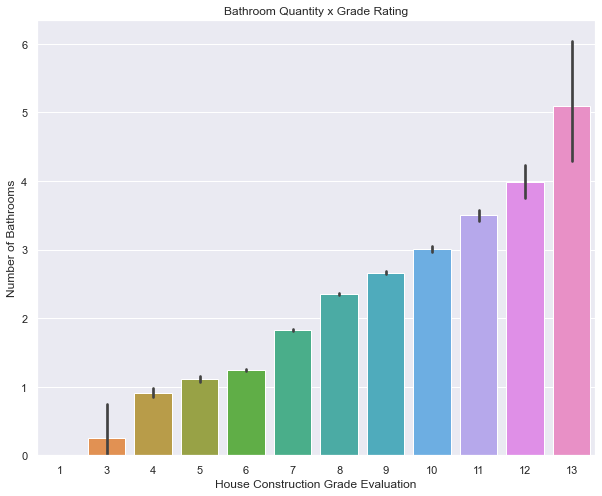

In [81]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"], y = df_housedata["bathrooms"])
plt.title('Bathroom Quantity x Grade Rating')
plt.ylabel('Number of Bathrooms')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

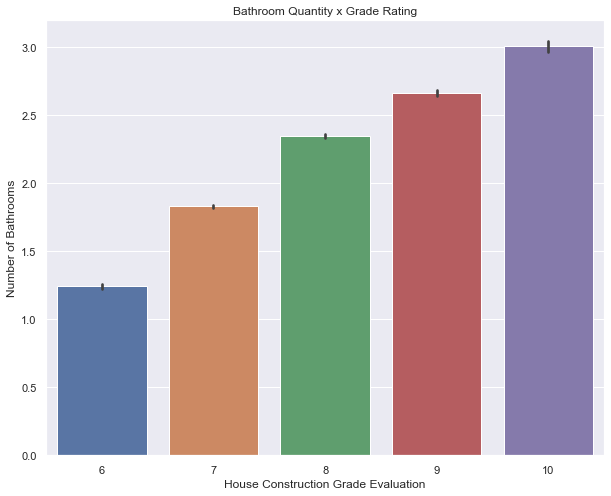

In [82]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"][grade_filter_up][grade_filter_low], y = df_housedata["bathrooms"])
plt.title('Bathroom Quantity x Grade Rating')
plt.ylabel('Number of Bathrooms')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

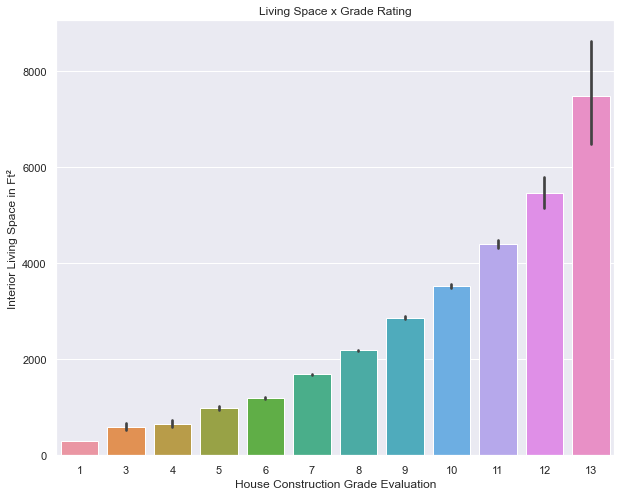

In [83]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"], y = df_housedata["sqft_living"])
plt.title('Living Space x Grade Rating')
plt.ylabel('Interior Living Space in Ft²')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

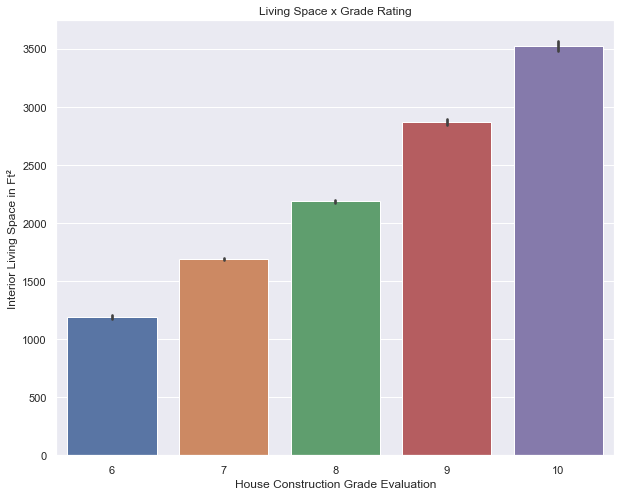

In [84]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"][grade_filter_up][grade_filter_low], y = df_housedata["sqft_living"])
plt.title('Living Space x Grade Rating')
plt.ylabel('Interior Living Space in Ft²')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

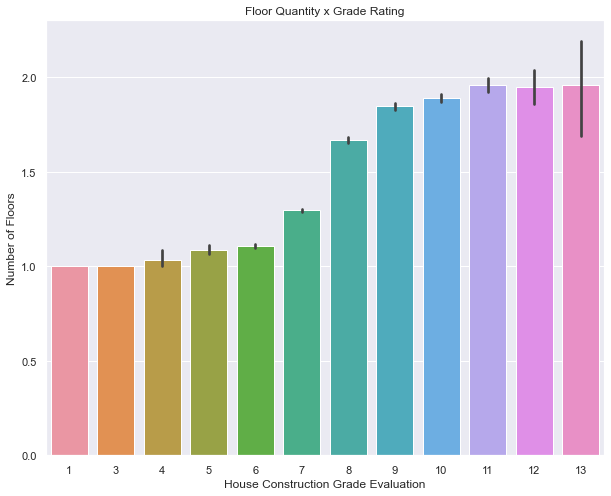

In [85]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"], y = df_housedata["floors"])
plt.title('Floor Quantity x Grade Rating')
plt.ylabel('Number of Floors')
plt.xlabel('House Construction Grade Evaluation')

Text(0.5, 0, 'House Construction Grade Evaluation')

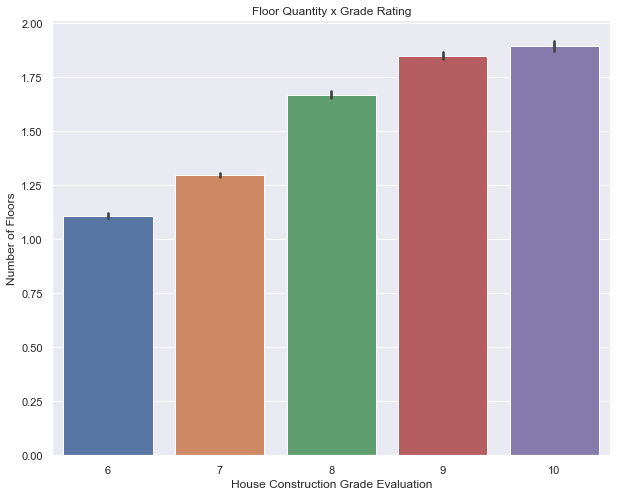

In [86]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = df_housedata["grade"][grade_filter_up][grade_filter_low], y = df_housedata["floors"])
plt.title('Floor Quantity x Grade Rating')
plt.ylabel('Number of Floors')
plt.xlabel('House Construction Grade Evaluation')

### Insights:

- We can treat grade levels above 10 and below 6 as Outliers (as they're so rare).

- We have more houses with grade level higher than 7 than houses with grade level lower than 7, being 7.65 the mean level.

- House prices are higher the better grade level they have.

- Houses with better grade levels tend to have more bathrooms.

- House living space quantity has a positive influence in grade evaluation.

## FT² Above

Text(0.5, 0, 'Living Space Above Ground in Ft²')

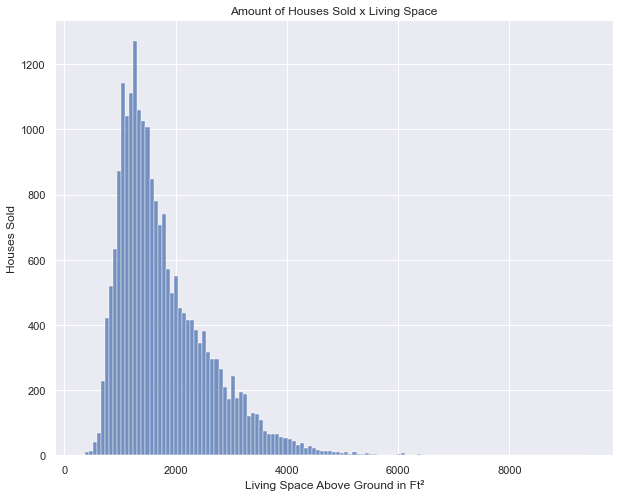

In [87]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=df_housedata['sqft_above'])
plt.title('Amount of Houses Sold x Living Space')
plt.ylabel('Houses Sold')
plt.xlabel('Living Space Above Ground in Ft²')

In [88]:
sqft_outliers = df_housedata['sqft_above']<=4000

Text(0.5, 0, 'Living Space Above Ground in Ft²')

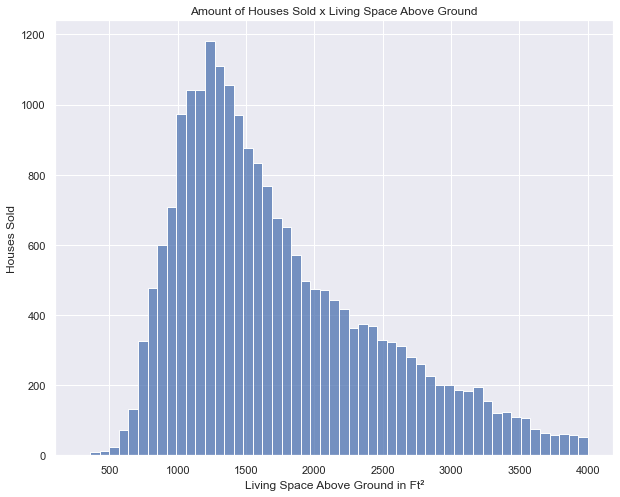

In [89]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=df_housedata['sqft_above'][sqft_outliers])
plt.title('Amount of Houses Sold x Living Space Above Ground')
plt.ylabel('Houses Sold')
plt.xlabel('Living Space Above Ground in Ft²')

Text(0.5, 0, 'Living Space Above Ground in Ft²')

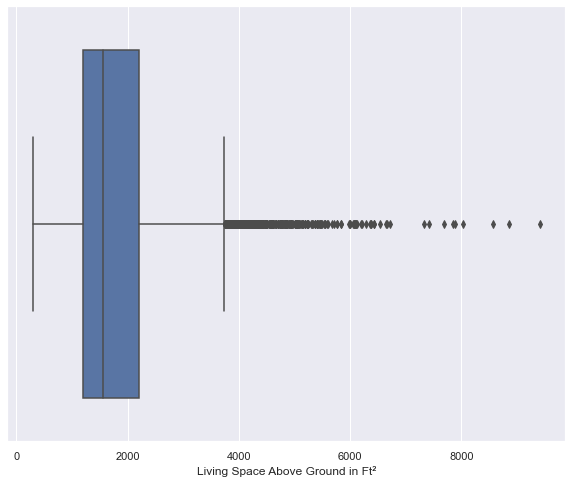

In [90]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x=df_housedata['sqft_above'])
plt.xlabel('Living Space Above Ground in Ft²')

Text(0.5, 0, 'Living Space Above Ground in Ft²')

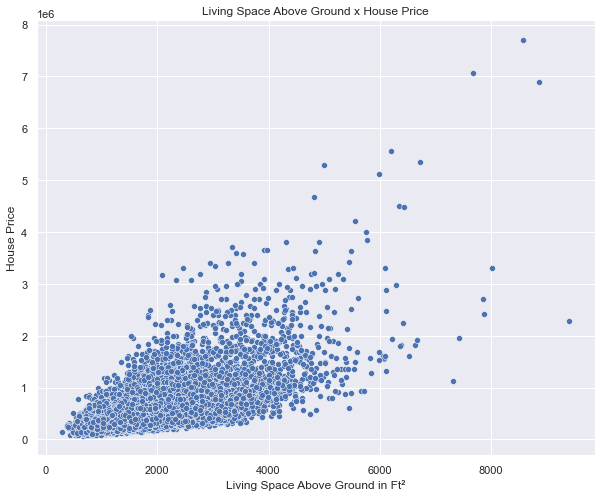

In [91]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=df_housedata['sqft_above'],y=df_housedata['price'])
plt.title('Living Space Above Ground x House Price')
plt.ylabel('House Price')
plt.xlabel('Living Space Above Ground in Ft²')

Text(0.5, 0, 'Living Space Above Ground in Ft²')

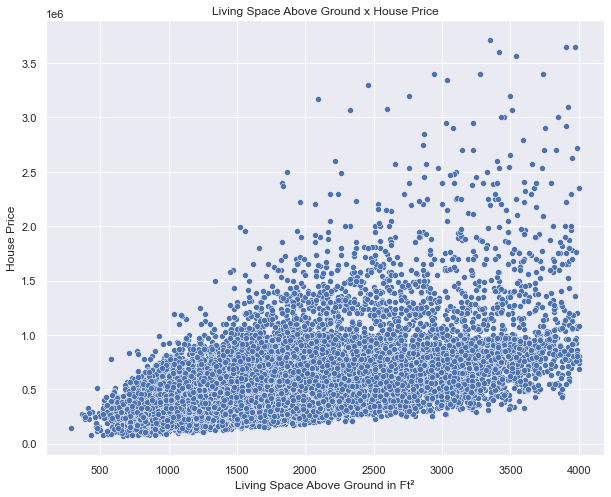

In [92]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=df_housedata['sqft_above'][sqft_outliers],y=df_housedata['price'])
plt.title('Living Space Above Ground x House Price')
plt.ylabel('House Price')
plt.xlabel('Living Space Above Ground in Ft²')

Text(0.5, 0, 'Interior Living Space in Ft²')

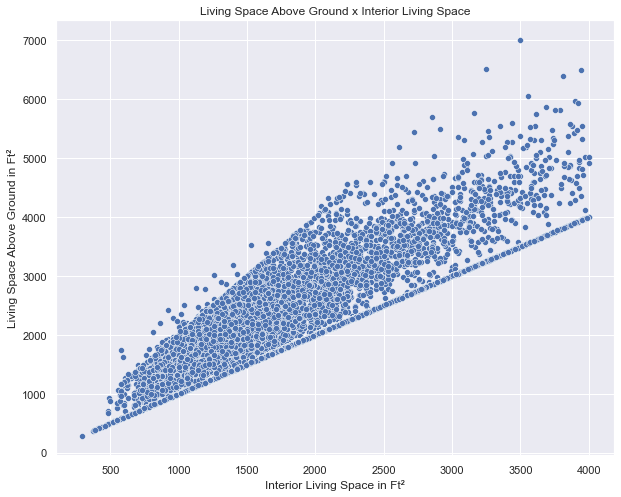

In [93]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=df_housedata['sqft_above'][sqft_outliers],y=df_housedata['sqft_living'])
plt.title('Living Space Above Ground x Interior Living Space')
plt.ylabel('Living Space Above Ground in Ft²')
plt.xlabel('Interior Living Space in Ft²')

### Insights:

- We have Outliers, considering values over 4000ft².

- Mean ft² above ground is 1788.

- Ft² above and Ft² living are directly related, almost completely correlated.

- House prices are higher the bigger ft² above they have available.

- Houses with a bigger living space tend to have more bedrooms and a better grade evaluation.


## Latitude, Longitude and Zipcode

Text(0.5, 0, 'Longitude')

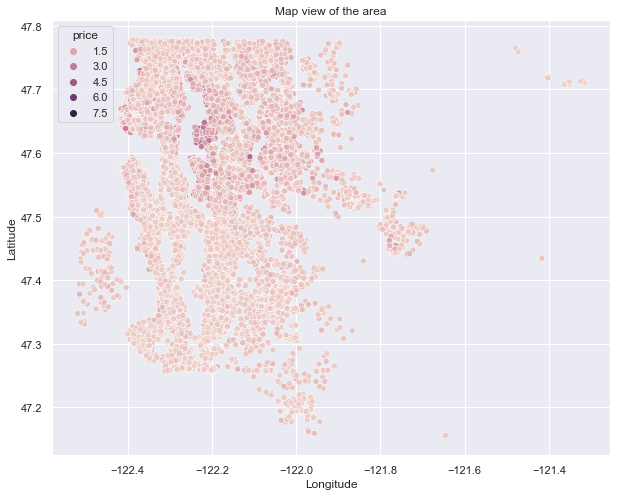

In [94]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_housedata['long'],y=df_housedata['lat'],hue=df_housedata['price'])
plt.title('Map view of the area')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

### ZipCode, Latitude and Longitude Conclusions

- We can see that the area where the most expensive houses have been sold are in the coordinates -122.2 Longitude and 47.6 Latitude, near Medina and Bellevue, close to Lake Washington

## Best and Worst Buys (Simple Overview)

# Machine Learning Algorithm for best investment.

In this part of the program i intend to make an algorithm to preview the best suitable price of a house based on its scores on certain features, it's a project in development, as i get better on data analysis, i will get back to finish this part of the project.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

## Feature Markdown